[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


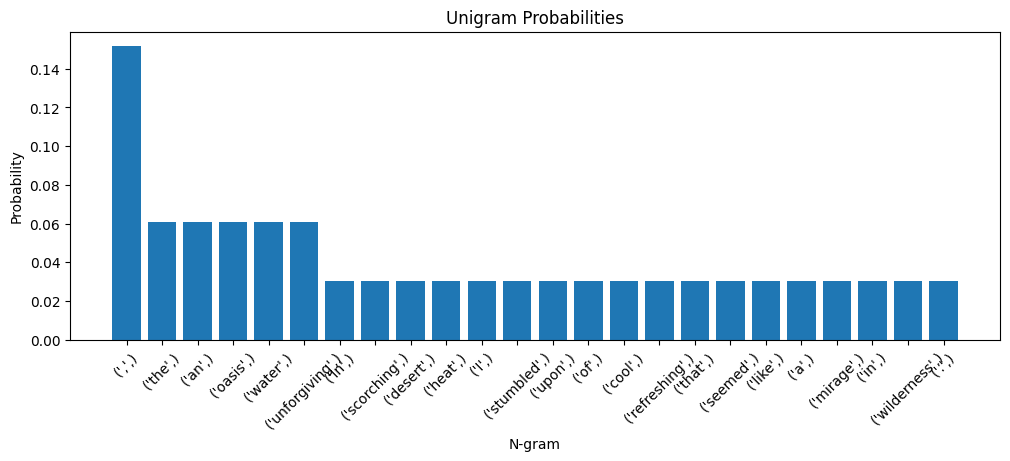

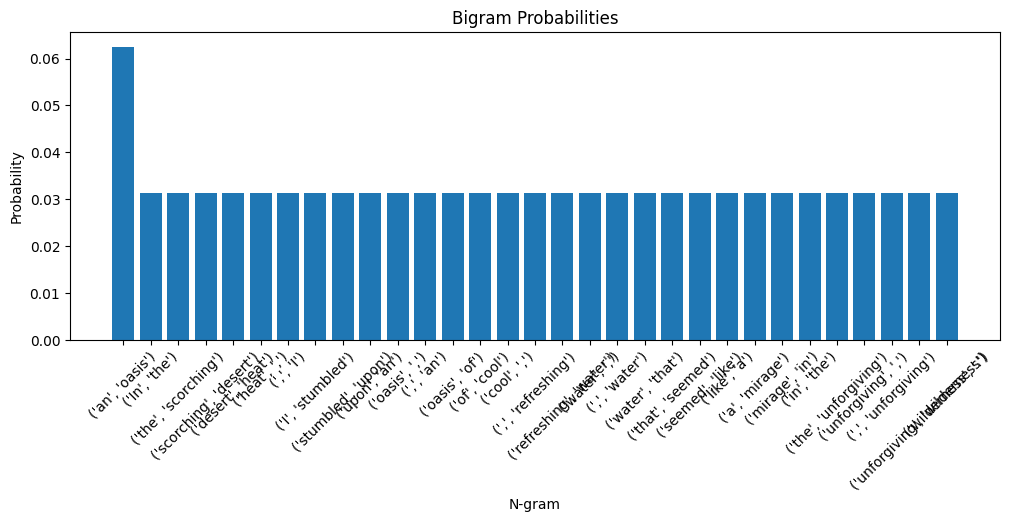

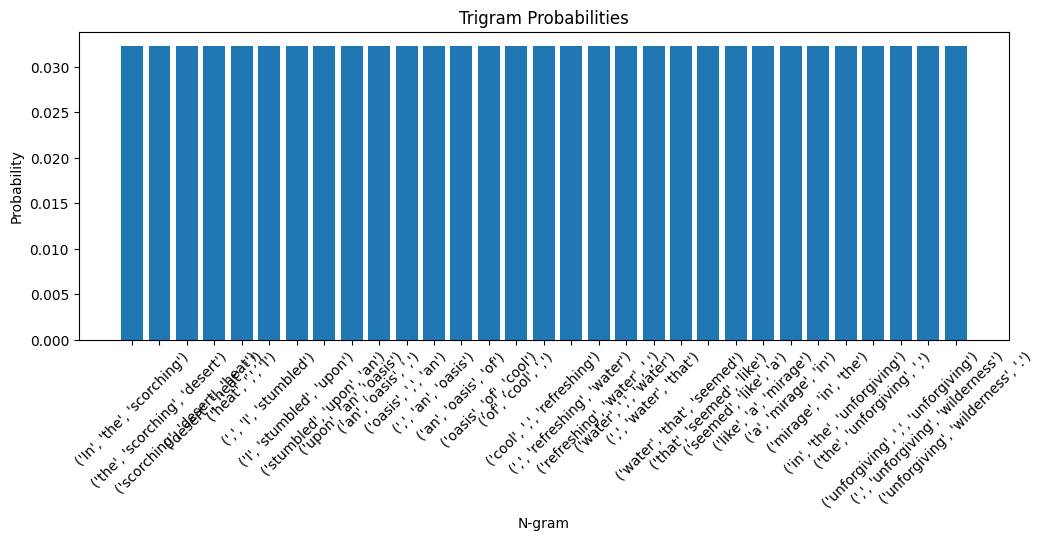

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127880 (\N{BALLOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

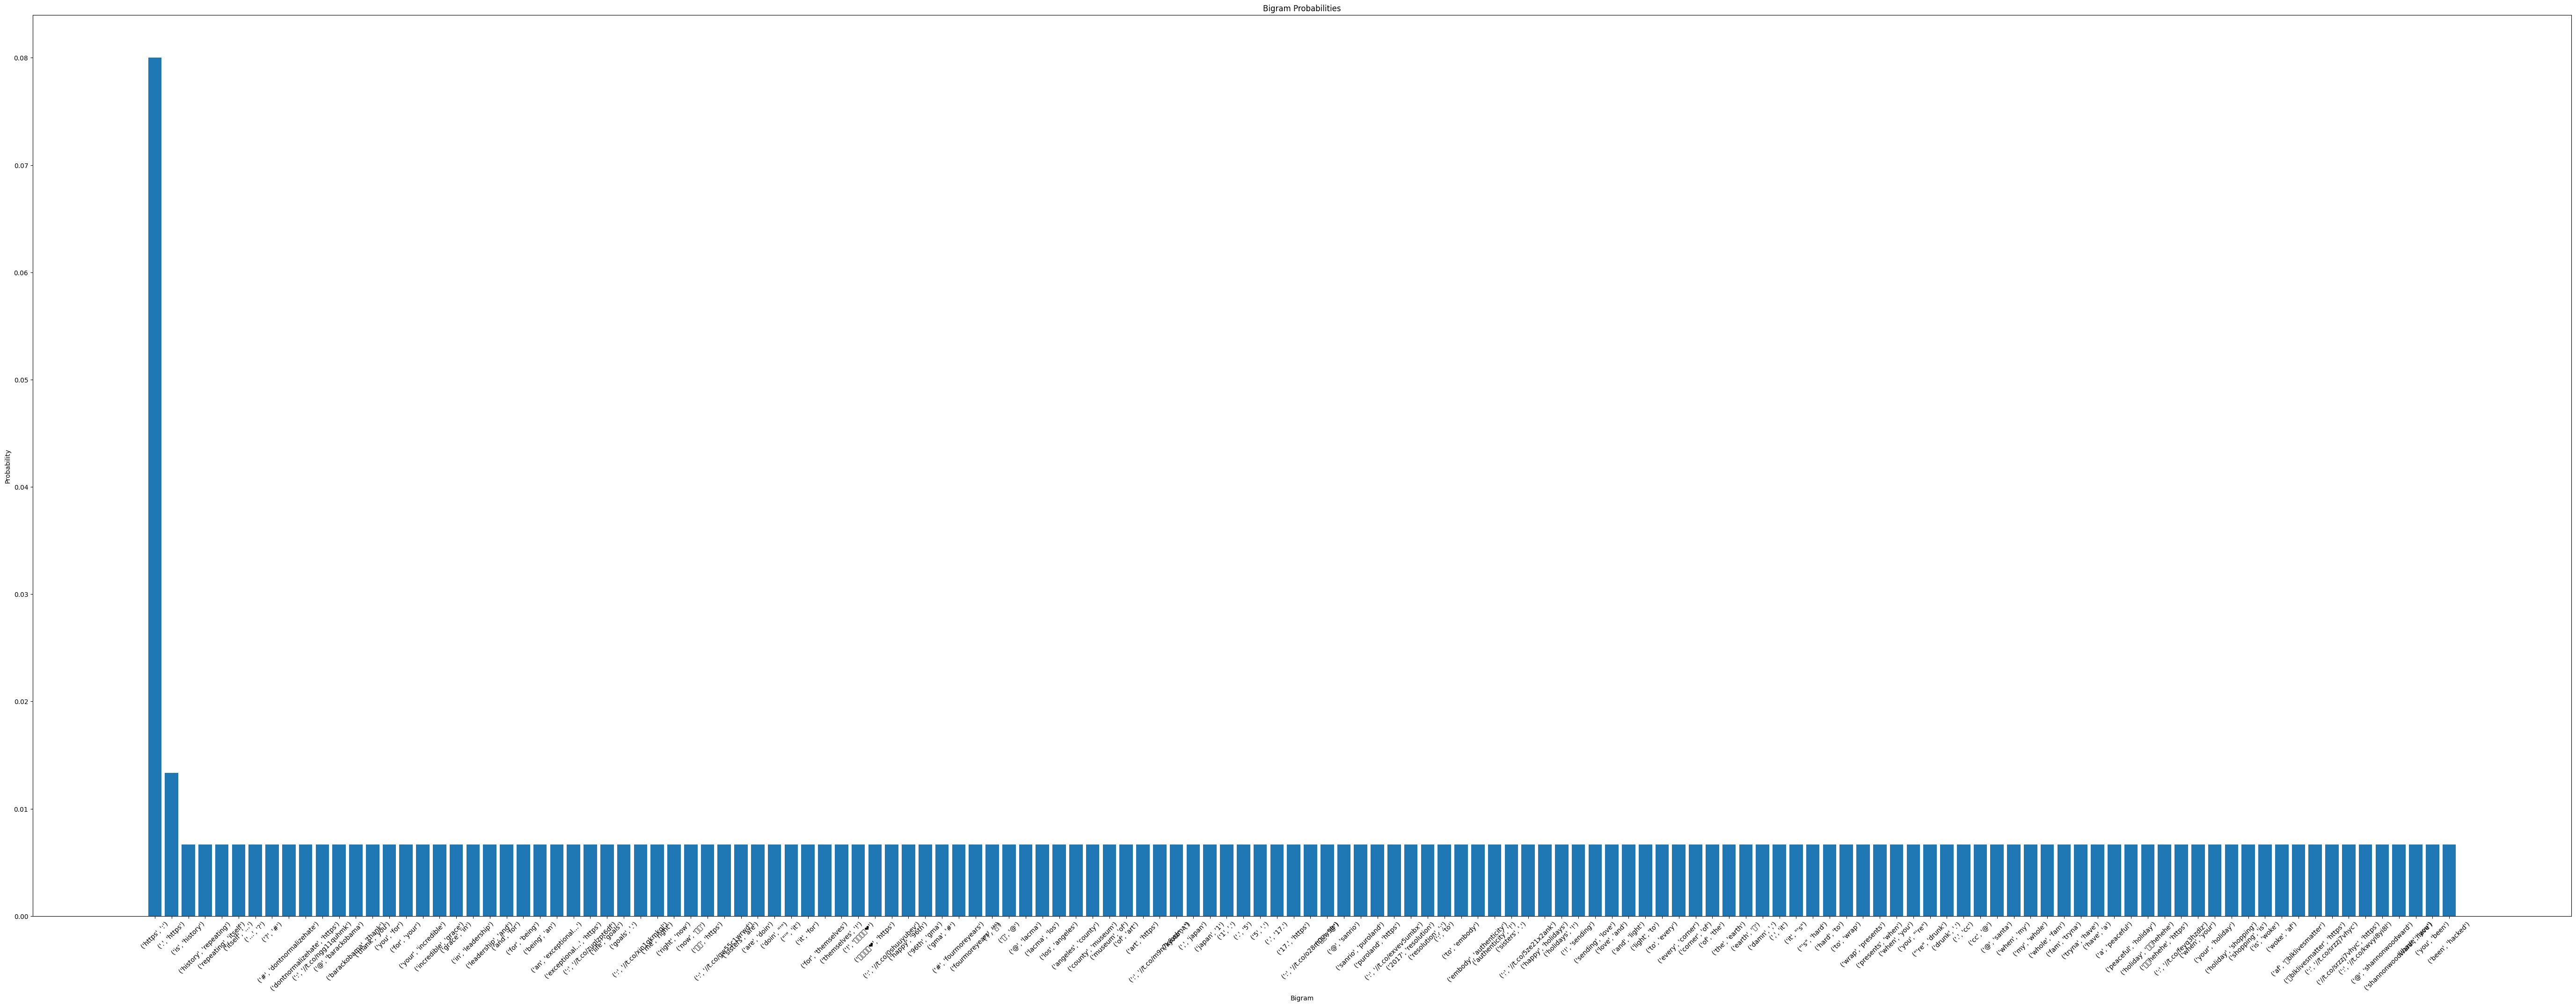

In [2]:

import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')

sentence ="""In the scorching desert heat, I stumbled upon an oasis, an oasis of cool, refreshing water,
            water that seemed like a mirage in the unforgiving, unforgiving wilderness."""

# Tokenize the sentence into words
words = nltk.word_tokenize(sentence)

unigrams = list(nltk.ngrams(words, 1))
bigrams = list(nltk.ngrams(words, 2))
trigrams = list(nltk.ngrams(words, 3))

unigram_freq = nltk.FreqDist(unigrams)
bigram_freq = nltk.FreqDist(bigrams)
trigram_freq = nltk.FreqDist(trigrams)
unigram_freq
bigram_freq
trigram_freq

total_unigrams = len(unigrams)
total_bigrams = len(bigrams)
total_trigrams = len(trigrams)

unigram_probabilities = {k: v / total_unigrams for k, v in unigram_freq.items()}
unigram_probabilities

bigram_probabilities = {k: v / total_bigrams for k, v in bigram_freq.items()}
bigram_probabilities

trigram_probabilities = {k: v / total_trigrams for k, v in trigram_freq.items()}
trigram_probabilities

# Plot the probabilities
def plot_probabilities(probabilities, title):
    items = list(probabilities.items())
    items.sort(key=lambda x: x[1], reverse=True)
    labels, values = zip(*items)

    plt.figure(figsize=(12, 4))
    plt.bar(range(len(labels)), values, align="center")
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Probability")
    plt.show()
plot_probabilities(unigram_probabilities, "Unigram Probabilities")

plot_probabilities(bigram_probabilities, "Bigram Probabilities")

plot_probabilities(trigram_probabilities, "Trigram Probabilities")

"""**N-Gram activity on column of Data Set**"""

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Load the Kaggle dataset into a DataFrame
# https://www.kaggle.com/datasets/codebreaker619/donald-trump-tweets-dataset

df = pd.read_csv("/content/drive/MyDrive/tweets.csv")
df.head(5)

text_column = df['content'].head(15)

# Preprocess the text (lowercase, remove punctuation, and tokenize)
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

# Create bigrams
bigrams = []
for text in text_column:
    tokens = preprocess_text(text)
    bigrams.extend(list(ngrams(tokens, 2)))

bigram_freq = FreqDist(bigrams)
bigram_freq

# Calculate the total number of bigrams for normalization
total_bigrams = len(bigrams)

# Calculate bigram probabilities
bigram_probabilities = {k: v / total_bigrams for k, v in bigram_freq.items()}

# Visualize bigram probabilities
def plot_probabilities(probabilities, title):
    items = list(probabilities.items())
    items.sort(key=lambda x: x[1], reverse=True)
    labels, values = zip(*items)
    plt.figure(figsize=(70, 25))
    plt.bar(range(len(labels)), values, align="center")
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.title(title)
    plt.xlabel("Bigram")
    plt.ylabel("Probability")
    plt.show()

plot_probabilities(bigram_probabilities, "Bigram Probabilities")


